In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
def viz_img(y_pred):
    n = 10
    fig = plt.figure(1)
    box_index = 1
    for cluster in range(10):
        result = np.where(y_pred == cluster)
        for i in np.random.choice(result[0].tolist(), n, replace=False):
            ax = fig.add_subplot(n, n, box_index)
            plt.imshow(x_train[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            box_index += 1
    plt.show()

In [4]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=300, verbose=2)
transformed = model.fit_transform(x_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.043s...
[t-SNE] Computed neighbors for 60000 samples in 249.000s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

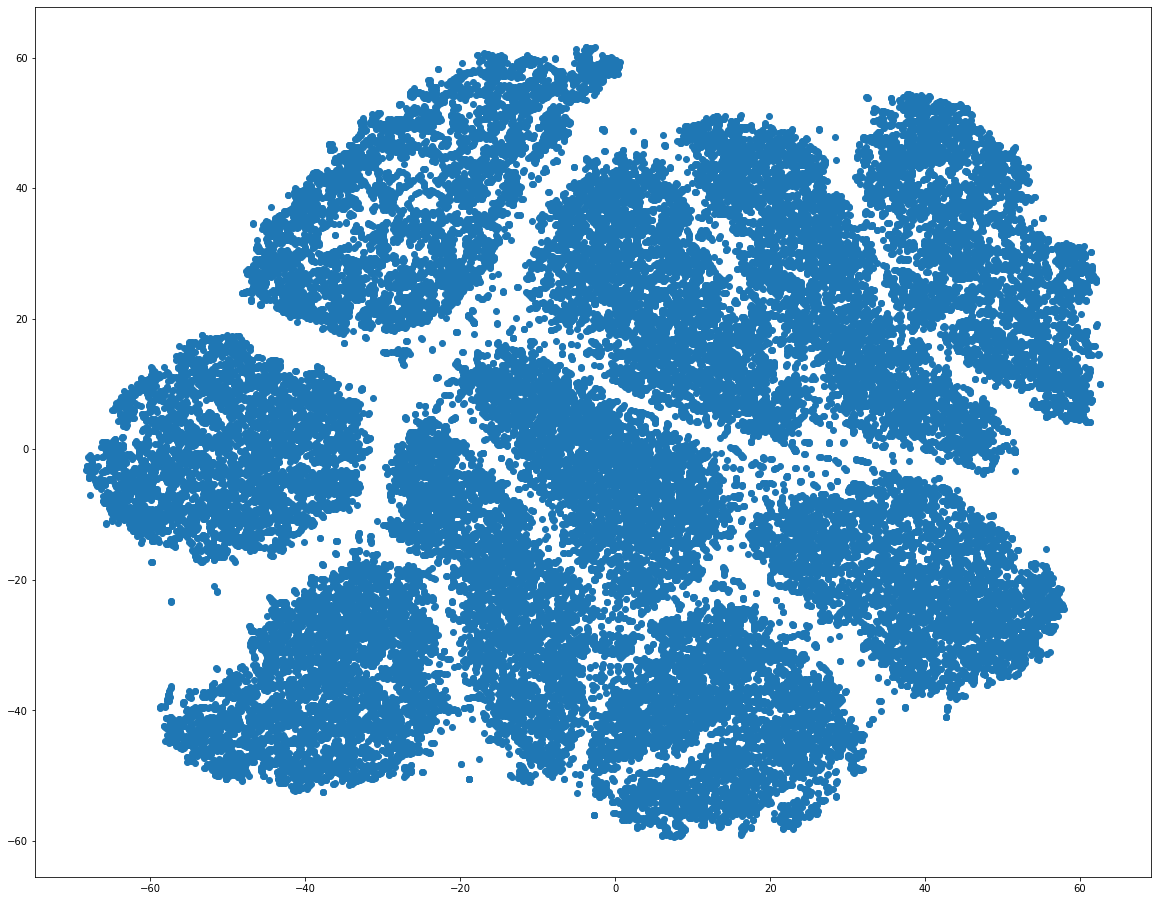

In [5]:
plt.rcParams['figure.figsize'] = [20, 16]
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)
plt.show()

In [6]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2.4, min_samples=100)
predict = model.fit(transformed)
pd.Series(predict.labels_).value_counts()

 3     6679
 7     6124
 4     5951
 1     5938
 6     5871
 8     5652
 5     5581
 2     5517
 0     5469
 9     5373
-1     1615
 10     117
 11     113
dtype: int64

In [7]:
y_pred = predict.labels_

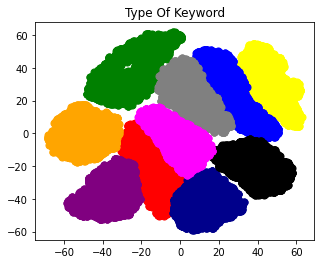

In [8]:
# Assign result to df
dataset = pd.DataFrame({'Column1':transformed[:,0],'Column2':transformed[:,1]})
dataset['cluster_num'] = pd.Series(predict.labels_)

# Cluster Viz 1
plt.rcParams['figure.figsize'] = [5, 4]
plt.scatter(dataset[dataset['cluster_num'] == 0]['Column1'], 
            dataset[dataset['cluster_num'] == 0]['Column2'], 
            s = 50, c = 'red', label = 'Customer Group 1')
plt.scatter(dataset[dataset['cluster_num'] == 1]['Column1'], 
            dataset[dataset['cluster_num'] == 1]['Column2'], 
            s = 50, c = 'orange', label = 'Customer Group 2')
plt.scatter(dataset[dataset['cluster_num'] == 2]['Column1'], 
            dataset[dataset['cluster_num'] == 2]['Column2'], 
            s = 50, c = 'yellow', label = 'Customer Group 3')
plt.scatter(dataset[dataset['cluster_num'] == 3]['Column1'], 
            dataset[dataset['cluster_num'] == 3]['Column2'], 
            s = 50, c = 'green', label = 'Customer Group 4')
plt.scatter(dataset[dataset['cluster_num'] == 4]['Column1'], 
            dataset[dataset['cluster_num'] == 4]['Column2'], 
            s = 50, c = 'blue', label = 'Customer Group 5')
plt.scatter(dataset[dataset['cluster_num'] == 5]['Column1'], 
            dataset[dataset['cluster_num'] == 5]['Column2'], 
            s = 50, c = 'darkblue', label = 'Customer Group 6')
plt.scatter(dataset[dataset['cluster_num'] == 6]['Column1'], 
            dataset[dataset['cluster_num'] == 6]['Column2'], 
            s = 50, c = 'purple', label = 'Customer Group 7')
plt.scatter(dataset[dataset['cluster_num'] == 7]['Column1'], 
            dataset[dataset['cluster_num'] == 7]['Column2'], 
            s = 50, c = 'gray', label = 'Customer Group 8')
plt.scatter(dataset[dataset['cluster_num'] == 8]['Column1'], 
            dataset[dataset['cluster_num'] == 8]['Column2'], 
            s = 50, c = 'black', label = 'Customer Group 9')
plt.scatter(dataset[dataset['cluster_num'] == 9]['Column1'], 
            dataset[dataset['cluster_num'] == 9]['Column2'], 
            s = 50, c = 'magenta', label = 'Customer Group 10')
plt.title('Type Of Keyword')
plt.show()

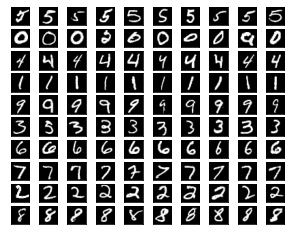

In [9]:
viz_img(y_pred)